# Looking at the identical resistance patterns

In [1]:
# generic import environment
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
print('versions')
print ('------------')
import pandas as pd
print('pandas: ', pd.__version__)

pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np
print('numpy: ', np.__version__)
# np.set_printoptions(suppress=False)

import time as time
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
print('mpl: ', mpl.__version__)
%matplotlib inline

versions
------------
pandas:  0.17.1
numpy:  1.10.4
mpl:  1.5.1


In [2]:
# load data
df = pd.read_csv('data/kmer_example.csv', sep='\t')
print(df.shape)

(999, 607)


In [3]:
# force convert R/S col's to int; check for erroneous data
for x in df.columns.values[1:]:
    df[x] = df[x].astype(int)

In [4]:
# simple function to determine string length
def str_length(s):
    return len(str(s))

### take duplicate resistance "patterns" and spot check nucoletiode sequences

In [5]:
# force convert R/S col's to int; check for erroneous data
for x in df.columns.values[1:]:
    df[x] = df[x].astype(str)

join_cols = df.columns.values[1:]

mapping_df = pd.DataFrame()

mapping_df['super_kmer'] = df[join_cols].apply(lambda x: ''.join(x), axis=1)

og_shape = df.shape[1]
new_shape = len(mapping_df['super_kmer'].unique())
print( og_shape, '|', new_shape, ' ==> ', np.round((1 - (float(new_shape)/float(og_shape))),4), '(%) of resistance "patterns" are duplicates' )

for x in df.columns.values[1:]:
    df[x] = df[x].astype(int)

607 | 548  ==>  0.0972 (%) of resistance "patterns" are duplicates


In [6]:
unique_resist_pattern_list = list(mapping_df.values)
count_iter = []
for x in unique_resist_pattern_list:
    count_iter.append(unique_resist_pattern_list.count(x))
print(max(count_iter))    

158


In [7]:
ctr_df = pd.DataFrame({'count':count_iter,'pattern':unique_resist_pattern_list})
ctr_df = ctr_df.sort_values(['count'],ascending=False)
ctr_df = ctr_df.reset_index(drop=True)
ctr_df['count'].unique()

array([158,  78,  23,  20,  13,  11,   9,   8,   7,   6,   5,   4,   3,
         2,   1])

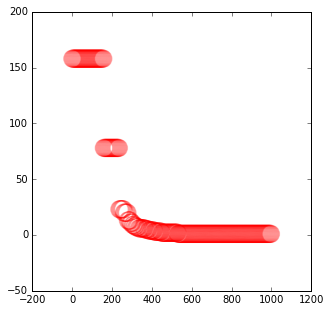

In [8]:
mpl.rc('figure', figsize=(5, 5))
XXX = ctr_df.index.values
YYY = ctr_df['count'].values

plt.scatter(XXX, YYY, s=300, facecolors='none', edgecolors='r',alpha=0.1)

In [9]:
mapping_df['kmer'] = df['kmer']

##### all of these have an identical resistance pattern...

In [10]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[0])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAAGACATAATTAAAGCATATAT', 'AAAAAAAAGTAATTGCAGCTATTATTGG',
       'AAAAAAAATATCCACGAACCATGGTTGT', 'AAAAAAAATATGTTGCAGCACGCGCGAT',
       'AAAAAAAATGCTATTAATGATCTCGAAG', 'AAAAAAACAAATCGTACCTCAAATCACT',
       'AAAAAAACAACATCAAAAAAAAGAACAA', 'AAAAAAACAACATTAGATATCACTGGTA',
       'AAAAAAACAAGCAACTACCATTACGATA', 'AAAAAAACAATTGATTACAACAACTGAA',
       'AAAAAAACAATTGCACAGTATAAAAAGG', 'AAAAAAACACCAACAATTTTTATAAGAG',
       'AAAAAAACAGATGATGTTGAAATGACTT', 'AAAAAAACAGTAAGCCATTTAAATGACT',
       'AAAAAAACATGTATTGAATGGCGAGTTT', 'AAAAAAACATTCCCTGGATATGTTTTAG',
       'AAAAAAACCACCTTTTCTCTATATTTAC', 'AAAAAAACCTGAAAATGAGTTAATTAAA',
       'AAAAAAACGAACGTTAAACATGAATCAC', 'AAAAAAACGATCATGTTGTATTTGAGTA',
       'AAAAAAACGCACAACCATCCATAGGAAA', 'AAAAAAACGCCATCAACATCAAATAAAA',
       'AAAAAAACGCCATGCACTTGGTTGTTGT', 'AAAAAAACGCTGACTTACATCAGCGTTT',
       'AAAAAAACGTAATAAAGAAAATGCTGAT', 'AAAAAAACGTACAAAGTCAATTGCATAT',
       'AAAAAAACGTACATGTGTACCTACTTTG', 'AAAAAAACGTATTTTAAATGGGCAGAAA',
      

In [11]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[1])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAAATCAAATCCTGACTATTTAG', 'AAAAAAAATAAAATTTCTGGTTTTCAAT',
       'AAAAAAAATAATTCATGTATTAAAAAAA', 'AAAAAAAATCAAATCCTGACTATTTAGC',
       'AAAAAAAATCCCAGAAAATTAACACCTC', 'AAAAAAAATTGTAGAAGCTTGGCCAGCA',
       'AAAAAAACAATTTACTTTGACATGCTAT', 'AAAAAAACACCTCGACATAACTTCGAGG',
       'AAAAAAACACTCATTATTTCAATGGCCC', 'AAAAAAACAGTTATATATTTTTGTTAGA',
       'AAAAAAACATTAATTTCAAAGCGTATGC', 'AAAAAAACCCACTAACGAAATTATGAAA',
       'AAAAAAACGCGCCAATATAAAACCATTT', 'AAAAAAACTAAGCGTGCTGTTCGTGTCA',
       'AAAAAAACTCATAGCAATCTGTTGTCGG', 'AAAAAAAGAAACATTGATATCTCAGTTT',
       'AAAAAAAGAAAGGCACGATGTATAGAAC', 'AAAAAAAGAACCATTCTTTGGTGTTGCA',
       'AAAAAAAGATAACACTTATAAAATTCTA', 'AAAAAAAGATAATAATGAAGTGCGTATT',
       'AAAAAAAGATAGAAATACCCACTAAAAA', 'AAAAAAAGATCGCTGCCATTAAACGAAT',
       'AAAAAAAGCACTAAACTTTTAATGAAAT', 'AAAAAAAGCCAAGGCAACGGATGTTACC',
       'AAAAAAAGCCGAACAAATTATAGATTTT', 'AAAAAAAGCGATTCATCAGATGTCAAAA',
       'AAAAAAAGCTACATCAAAATTGAACAAA', 'AAAAAAAGCTTGTTACAAGCGTATTTTC',
      

In [12]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[2])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAACATTTCTCATTTTCAAAATCA', 'AAAAAAACCTATAGATGCCATTAATGAT',
       'AAAAAAACGCATCACTGAGATTTTGATT', 'AAAAAAACGGCGTATGCTTATATGTAAG',
       'AAAAAAAGAGGCAACCGTCAGTAACAGT', 'AAAAAAAGGCCCAAAAAGATAAAAATAC',
       'AAAAAAATAATGCTTTTAATTGCAGTCA', 'AAAAAAATAATTGGGTTAATTTTATTAT',
       'AAAAAAATACAAAAATCTAACCTTCTTG', 'AAAAAAATACATCCATCGACAAGAACAA',
       'AAAAAAATAGCATAGAGTTATAAAAAAT', 'AAAAAAATAGCATTATATATAAATTCAA',
       'AAAAAAATGCTAATAAAAATAATTAATG', 'AAAAAAATGTTCATCAAAAGCAAAGGTT',
       'AAAAAAATTAACTGAACATTATGATGTA', 'AAAAAAATTAGAAAATAGATTATTTAAG',
       'AAAAAAATTAGTATCTACATCAGATACT', 'AAAAAAATTATCAAAATTTAAATTTTTG',
       'AAAAAAATTATGACCAAATAAGTTCTAT', 'AAAAAAATTTTGCTATCATAAATAACGT',
       'AAAAAACAAAATTCATTAGATTCAGTAG', 'AAAAAACAAATTTTTTAGGGGTAAACGG',
       'AAAAAACAACTAAAATAACTATCAATAG'], dtype=object)

In [13]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[3])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAATAGCTATTTTACCTCAATCA', 'AAAAAAAATCATCGTATCTCAGGATGAT',
       'AAAAAAACATTACCTACTACATTTGAAT', 'AAAAAAACCACCCATACGATTTTCAATA',
       'AAAAAAACGTTGAACTTTATTTAAAGGT', 'AAAAAAAGAAATGAAGTATTTCTGAAAA',
       'AAAAAAAGATAGTTATTTATGTGAATGG', 'AAAAAAAGGGTTGTCAGCGGGTCGAGTT',
       'AAAAAAAGTGGGCCCACGTTTGGGTGCC', 'AAAAAAATAACGAGTTACGAAAAAGTAA',
       'AAAAAAATAGCTATTTTACCTCAATCAC', 'AAAAAAATATAACTTATATTTATACTGA',
       'AAAAAAATCAAAAGACACAGCATATTTC', 'AAAAAAATCAGTCGGCAAAATCTCATTT',
       'AAAAAAATCATCGTATCTCAGGATGATA', 'AAAAAAATCCGCAATACAAATAAAGGTA',
       'AAAAAAATGCAAAATTAACTAATAAATT', 'AAAAAAATTATAATACTTCTAAAAATGA',
       'AAAAAACAAATCGTTTCTTCTTATTCGC', 'AAAAAACAACATGCGTGTGGAACCAATC'], dtype=object)

In [14]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[4])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAATCAAATCGTTTCGAGAGATA', 'AAAAAAACCTGTAATCTTCCGTGCTACA',
       'AAAAAAAGAACTAAGAGGTTGAGCTCTT', 'AAAAAAAGATAAGGCTGAAGAAAAGCGT',
       'AAAAAAAGATGAGCATCTACTGTCTCAT', 'AAAAAAAGATTATGCAGATATTAACTTT',
       'AAAAAAAGCTATTACGACTGGTTTTCTT', 'AAAAAAATAAATCCGCTATCTAAATGAC',
       'AAAAAAATAACGGTCTCATTTAAGAGAC', 'AAAAAAATATATAAGTCATTAACTGTCT',
       'AAAAAAATCAAATCGTTTCGAGAGATAC', 'AAAAAACAAAAAGAAAAAGTTAAGCCAA',
       'AAAAAACAAATAATGATGTTTCAACAAA'], dtype=object)

In [15]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[5])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAACAAAAAATTAAACGGTATTGA', 'AAAAAAACTATAAAATTTTTCAAGTAAT',
       'AAAAAAAGACCTGACAAACATGAACGTT', 'AAAAAAAGCGATTAAAGCACAACAAGCA',
       'AAAAAAAGTATCGATAACCATATATTGG', 'AAAAAAATGATAAACACCAAACATCTGA',
       'AAAAAAATGTCAGAATACAAGAAAAAGA', 'AAAAAAATGTGCAAAATTACTTTTGCAC',
       'AAAAAAATTATGTATCTAAATCATATGC', 'AAAAAAATTCCCGAGCACTACAACAAGG',
       'AAAAAACAAAAAATTAAACGGTATTGAT'], dtype=object)

In [16]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[6])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAACGCTCCCTCTCACAAATTCTG', 'AAAAAAACTTTTGAGTAATCGCAAGAAA',
       'AAAAAAAGGAACGCTACTTTGGCTAATG', 'AAAAAAATAACCTATGTTATAGATTATG',
       'AAAAAAATATTTGGTATTGAAATTAAAA', 'AAAAAAATCATCATTGCAATTCCAACTA',
       'AAAAAAATGACCAAGTTACCGGTCATAT', 'AAAAAAATGTTTGTAGAACATAAGGGTT',
       'AAAAAAATTTAGAGGTGATGTTATATGA'], dtype=object)

In [17]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[7])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAACTAATATATGTAGGCAAACT', 'AAAAAAACCTCGCAACGGTTAGTTAGCT',
       'AAAAAAACTAATATATGTAGGCAAACTA', 'AAAAAAAGAAATTGAAAGCTTTAAGTTT',
       'AAAAAAATATATTATTGAAACAACTTGA', 'AAAAAAATATCATTATTCTTTAATACTA',
       'AAAAAAATGTACATCAACATTCAGTACC', 'AAAAAAATGTAGAATAACATACAAAAAA'], dtype=object)

In [18]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[8])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAGAGGTGGATTCAATAAAATTA', 'AAAAAAAGCGCCAATACAGAACTTTAAT',
       'AAAAAAATATATTAAAAAGTGGTATTGC', 'AAAAAAATCATTCATGGTGAGGGCTTCA',
       'AAAAAAATCTTTGAATCGATTAACAGTC', 'AAAAAAATTTACTTATGTGCTCTACAAT',
       'AAAAAACAAAAAATCCCGCCCCTATACA'], dtype=object)

In [19]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[9])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAATAATATTTATATTTGTCGTA', 'AAAAAAAGGAAGTATTACGTATTTAAAA',
       'AAAAAAATAATATTTATATTTGTCGTAC', 'AAAAAAATACATGATTTAATTAGTGCTA',
       'AAAAAAATGAAACTTAAAAAAAATAATA', 'AAAAAAATTGATCGTGTGTTTTTAGAAC'], dtype=object)

In [20]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[10])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAAGCGCCTATGTCATGATTTAC', 'AAAAAAACCGTAATTTTAATGGGCGTGC',
       'AAAAAAAGCGCCTATGTCATGATTTACC', 'AAAAAAATAATATTCAACATAAGCACTT',
       'AAAAAAATTAGATAAAGAAGCGCTTTAC'], dtype=object)

In [21]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[11])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAATTACTAGGGTAGCTAGTGAT', 'AAAAAAACCCTTACAACAAATATGTAAG',
       'AAAAAAAGACAGTTCAGATGGAAATAAA', 'AAAAAAATTACTAGGGTAGCTAGTGATA'], dtype=object)

In [22]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[12])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAACATCGGATTTAATTTCAAGAT', 'AAAAAAACGCCATAGATTTTGGGGTGCA',
       'AAAAAAATTGCAGTAGTAGGTTATGGAT'], dtype=object)

In [23]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[13])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAACAAAAACAAAATTTAACTGAT', 'AAAAAACAAAAACAAAATTTAACTGATC'], dtype=object)

In [24]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[14])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAATGTTTTTTCTTGATCTATAAC'], dtype=object)

## chunk search

In [25]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[0])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
top_bucket = pd.Series(kmer_list_bunch).unique()

In [26]:
def chunk_search(x,chunk_length=4):
    starting_pos = np.random.randint(len(x))
    if starting_pos > (len(x) - chunk_length):
        starting_pos = len(x) - chunk_length
    return x[starting_pos:(starting_pos+chunk_length)]

In [27]:
x = top_bucket[np.random.randint(len(top_bucket))]
chunk_search(x)

'CAAA'

In [28]:
chunk_set = set([])
for nuc_seq in top_bucket:
    for loop in range(0,2000):
        tmp_cnk = chunk_search(nuc_seq,chunk_length=28)
        chunk_set.add(tmp_cnk)

In [29]:
for uuu in range(1,(len(mapping_df['kmer'].values[5])+1)):
    chunk_set = set([])
    for nuc_seq in top_bucket:
        for loop in range(0,2000):
            tmp_cnk = chunk_search(nuc_seq,chunk_length=uuu)
            chunk_set.add(tmp_cnk)
    print(uuu, len(chunk_set))        

1 4
2 16
3 64
4 247
5 756
6 1531
7 2180
8 2493
9 2599
10 2630
11 2603
12 2520
13 2393
14 2255
15 2108
16 1958
17 1808
18 1658
19 1508
20 1358
21 1208
22 1058
23 908
24 758
25 608
26 458
27 308
28 158


####### todo: try bayesian approach | loop through chunk sizes and match with resistance pattern (x in kmer)

### try one v all classifier

In [73]:
x = top_bucket[np.random.randint(len(top_bucket))]
map_against_random_seq = chunk_search(x,chunk_length=3)
map_against_random_seq

'TAG'

In [74]:
def contains_seq(s):
    return map_against_random_seq in s

def boolean_convert(s):
    if s == False:
        return 0
    else:
        return 1

In [75]:
df.head(1)

,kmer,R_1413323.3,R_1413324.3,R_1413325.3,R_1413328.3,R_1413329.3,R_1413331.3,R_1413332.3,R_1413333.3,R_1413334.3,R_1413336.3,R_1413337.3,R_1413338.3,R_1413339.3,R_1413340.3,R_1413341.3,R_1413342.3,R_1413343.3,R_1413344.3,R_1413345.3,R_1413346.3,R_1413347.3,R_1413349.3,R_1413352.3,R_1413353.3,R_1413373.3,R_1413374.3,R_1413376.3,R_1413377.3,R_1413378.3,R_1413379.3,R_1413380.3,R_1413381.3,R_1413382.3,R_1413383.3,R_1413384.3,R_1413385.3,R_1413387.3,R_1413388.3,R_1413389.3,R_1413390.3,R_1413391.3,R_1413392.3,R_1413393.3,R_1413394.3,R_1413395.3,R_1413396.3,R_1413399.3,R_1413401.3,R_1413402.3,R_1413405.3,R_1413406.3,R_1413407.3,R_1413408.3,R_1413409.3,R_1413410.3,R_1413411.3,R_1413412.3,R_1413413.3,R_1413416.3,R_1413418.3,R_1413419.3,R_1413420.3,R_1413421.3,R_1413422.3,R_1413423.3,R_1413424.3,R_1413425.3,R_1413426.3,R_1413427.3,R_1413428.3,R_1413429.3,R_1413430.3,R_1413431.3,R_1413432.3,R_1413433.3,R_1413434.3,R_1413435.3,R_1413436.3,R_1413437.3,R_1413438.3,R_1413439.3,R_1413440.3,R_1413441.3,R_1413446.3,R_1413447.3,R_1413448.3,R_1413449.3,R_1413450.3,R_1413451.3,R_1413456.3,R_1413457.3,R_1413458.3,R_1413459.3,R_1413461.3,R_1413466.3,R_1413467.3,R_1413470.3,R_1413471.3,R_1413472.3,R_1413473.3,R_1413474.3,R_1413475.3,R_1413476.3,R_1413477.3,R_1413480.3,R_1413484.3,R_1413485.3,R_1413486.3,R_1413487.3,R_1413488.3,R_1413514.3,R_1413515.3,R_1413516.3,R_1413517.3,R_1413518.3,R_1413519.3,R_1413521.3,R_1413522.3,R_1413523.3,R_1413524.3,R_1413570.3,R_1413572.3,R_1413574.3,R_1413575.3,R_1413576.3,R_1413577.3,R_1413578.3,R_1413580.3,R_1413581.3,R_1413586.3,R_1413587.3,R_1413588.3,R_1413591.3,R_1413592.3,R_1413595.3,R_1413596.3,R_1413597.3,R_1413599.3,R_1413600.3,R_1413603.3,R_1422390.3,R_1422391.3,R_1422392.3,R_1422393.3,R_1422394.3,R_1422395.3,R_1422396.3,R_1422397.3,R_1422398.3,R_1422399.3,R_1422400.3,R_1422401.3,R_1422402.3,R_1422403.3,R_1422404.3,R_1422405.3,R_1422406.3,R_1422407.3,R_1422408.3,R_1422409.3,R_1422410.3,R_1422411.3,R_1422412.3,R_1422413.3,R_1422414.3,R_1422415.3,R_1422416.3,R_1422417.3,R_1422418.3,R_1422419.3,R_1422420.3,R_1422421.3,R_1422422.3,R_1422423.3,R_1422424.3,R_1422425.3,R_1422426.3,R_1422427.3,R_1422428.3,R_1422429.3,R_1422430.3,R_1422431.3,R_1422432.3,R_1422433.3,R_1422434.3,R_1422435.3,R_1422436.3,R_1422437.3,R_1422438.3,R_1422439.3,R_1422440.3,R_1422441.3,R_1422442.3,R_1422443.3,R_1422444.3,R_1422445.3,R_1422446.3,R_1422447.3,R_1422448.3,R_1422449.3,R_1422450.3,R_1422451.3,R_1422452.3,R_1422453.3,R_1422454.3,R_1422455.3,R_1422456.3,R_1422457.3,R_1422458.3,R_1422459.3,R_1422460.3,R_1422461.3,R_1422462.3,R_1422463.3,R_1422464.3,R_1422465.3,R_1422466.3,R_1422467.3,R_1422468.3,R_1422469.3,R_1422470.3,R_1422471.3,R_1422472.3,R_1422473.3,R_1422474.3,R_1422475.3,R_1422476.3,R_1422477.3,R_1422478.3,R_1422479.3,R_1422480.3,R_1422481.3,R_1422482.3,R_1422483.3,R_1422484.3,R_1422485.3,R_1422488.3,R_1422489.3,R_1422490.3,R_1422491.3,R_1422492.3,R_1422493.3,R_1422494.3,R_1422495.3,R_1422497.3,R_1422498.3,R_1422500.3,R_1422503.3,R_1422508.3,R_1422509.3,R_1422510.3,R_1422511.3,R_1422512.3,R_1422513.3,R_1422514.3,R_1422515.3,R_1422516.3,R_1422517.3,R_1422518.3,R_1422519.3,R_1422520.3,R_1422521.3,R_1422522.3,R_1422523.3,R_1422524.3,R_1422525.3,R_1422526.3,R_1422527.3,R_1422528.3,R_1422529.3,R_1422530.3,R_1422531.3,R_1422532.3,R_1422533.3,R_1422534.3,R_1422535.3,R_1422536.3,R_1422537.3,R_1422538.3,R_1422539.3,R_1422540.3,R_1422541.3,R_1422542.3,R_1422543.3,R_1422544.3,R_1422545.3,R_1422546.3,R_1422547.3,R_1422548.3,R_1422549.3,R_1422550.3,R_1422551.3,R_1422552.3,R_1422553.3,R_1422554.3,R_1422555.3,R_1422556.3,R_1422557.3,R_1422558.3,R_1422559.3,R_1422560.3,R_1422561.3,R_1422562.3,R_1422563.3,R_1422564.3,R_1422565.3,R_1422566.3,R_1422567.3,R_1422568.3,R_1422569.3,R_1422570.3,R_1422571.3,R_1422572.3,R_1422573.3,R_1422574.3,R_1422575.3,R_1422576.3,R_1422577.3,R_1422578.3,R_1422579.3,R_1422580.3,R_1422581.3,R_1422582.3,R_1422583.3,R_1422584.3,R_1422585.3,R_1422586.3,R_1422587.3,R_1422588.3,R_1422589.3,R_1422590.3,R_1422591.3,R_1422592.

In [76]:
df['tmp'] = df['kmer'].apply(contains_seq)
df['tmp'] = df['tmp'].apply(boolean_convert)

In [77]:
sum(df['tmp'].values)

293

In [78]:
df.head(1)

,kmer,R_1413323.3,R_1413324.3,R_1413325.3,R_1413328.3,R_1413329.3,R_1413331.3,R_1413332.3,R_1413333.3,R_1413334.3,R_1413336.3,R_1413337.3,R_1413338.3,R_1413339.3,R_1413340.3,R_1413341.3,R_1413342.3,R_1413343.3,R_1413344.3,R_1413345.3,R_1413346.3,R_1413347.3,R_1413349.3,R_1413352.3,R_1413353.3,R_1413373.3,R_1413374.3,R_1413376.3,R_1413377.3,R_1413378.3,R_1413379.3,R_1413380.3,R_1413381.3,R_1413382.3,R_1413383.3,R_1413384.3,R_1413385.3,R_1413387.3,R_1413388.3,R_1413389.3,R_1413390.3,R_1413391.3,R_1413392.3,R_1413393.3,R_1413394.3,R_1413395.3,R_1413396.3,R_1413399.3,R_1413401.3,R_1413402.3,R_1413405.3,R_1413406.3,R_1413407.3,R_1413408.3,R_1413409.3,R_1413410.3,R_1413411.3,R_1413412.3,R_1413413.3,R_1413416.3,R_1413418.3,R_1413419.3,R_1413420.3,R_1413421.3,R_1413422.3,R_1413423.3,R_1413424.3,R_1413425.3,R_1413426.3,R_1413427.3,R_1413428.3,R_1413429.3,R_1413430.3,R_1413431.3,R_1413432.3,R_1413433.3,R_1413434.3,R_1413435.3,R_1413436.3,R_1413437.3,R_1413438.3,R_1413439.3,R_1413440.3,R_1413441.3,R_1413446.3,R_1413447.3,R_1413448.3,R_1413449.3,R_1413450.3,R_1413451.3,R_1413456.3,R_1413457.3,R_1413458.3,R_1413459.3,R_1413461.3,R_1413466.3,R_1413467.3,R_1413470.3,R_1413471.3,R_1413472.3,R_1413473.3,R_1413474.3,R_1413475.3,R_1413476.3,R_1413477.3,R_1413480.3,R_1413484.3,R_1413485.3,R_1413486.3,R_1413487.3,R_1413488.3,R_1413514.3,R_1413515.3,R_1413516.3,R_1413517.3,R_1413518.3,R_1413519.3,R_1413521.3,R_1413522.3,R_1413523.3,R_1413524.3,R_1413570.3,R_1413572.3,R_1413574.3,R_1413575.3,R_1413576.3,R_1413577.3,R_1413578.3,R_1413580.3,R_1413581.3,R_1413586.3,R_1413587.3,R_1413588.3,R_1413591.3,R_1413592.3,R_1413595.3,R_1413596.3,R_1413597.3,R_1413599.3,R_1413600.3,R_1413603.3,R_1422390.3,R_1422391.3,R_1422392.3,R_1422393.3,R_1422394.3,R_1422395.3,R_1422396.3,R_1422397.3,R_1422398.3,R_1422399.3,R_1422400.3,R_1422401.3,R_1422402.3,R_1422403.3,R_1422404.3,R_1422405.3,R_1422406.3,R_1422407.3,R_1422408.3,R_1422409.3,R_1422410.3,R_1422411.3,R_1422412.3,R_1422413.3,R_1422414.3,R_1422415.3,R_1422416.3,R_1422417.3,R_1422418.3,R_1422419.3,R_1422420.3,R_1422421.3,R_1422422.3,R_1422423.3,R_1422424.3,R_1422425.3,R_1422426.3,R_1422427.3,R_1422428.3,R_1422429.3,R_1422430.3,R_1422431.3,R_1422432.3,R_1422433.3,R_1422434.3,R_1422435.3,R_1422436.3,R_1422437.3,R_1422438.3,R_1422439.3,R_1422440.3,R_1422441.3,R_1422442.3,R_1422443.3,R_1422444.3,R_1422445.3,R_1422446.3,R_1422447.3,R_1422448.3,R_1422449.3,R_1422450.3,R_1422451.3,R_1422452.3,R_1422453.3,R_1422454.3,R_1422455.3,R_1422456.3,R_1422457.3,R_1422458.3,R_1422459.3,R_1422460.3,R_1422461.3,R_1422462.3,R_1422463.3,R_1422464.3,R_1422465.3,R_1422466.3,R_1422467.3,R_1422468.3,R_1422469.3,R_1422470.3,R_1422471.3,R_1422472.3,R_1422473.3,R_1422474.3,R_1422475.3,R_1422476.3,R_1422477.3,R_1422478.3,R_1422479.3,R_1422480.3,R_1422481.3,R_1422482.3,R_1422483.3,R_1422484.3,R_1422485.3,R_1422488.3,R_1422489.3,R_1422490.3,R_1422491.3,R_1422492.3,R_1422493.3,R_1422494.3,R_1422495.3,R_1422497.3,R_1422498.3,R_1422500.3,R_1422503.3,R_1422508.3,R_1422509.3,R_1422510.3,R_1422511.3,R_1422512.3,R_1422513.3,R_1422514.3,R_1422515.3,R_1422516.3,R_1422517.3,R_1422518.3,R_1422519.3,R_1422520.3,R_1422521.3,R_1422522.3,R_1422523.3,R_1422524.3,R_1422525.3,R_1422526.3,R_1422527.3,R_1422528.3,R_1422529.3,R_1422530.3,R_1422531.3,R_1422532.3,R_1422533.3,R_1422534.3,R_1422535.3,R_1422536.3,R_1422537.3,R_1422538.3,R_1422539.3,R_1422540.3,R_1422541.3,R_1422542.3,R_1422543.3,R_1422544.3,R_1422545.3,R_1422546.3,R_1422547.3,R_1422548.3,R_1422549.3,R_1422550.3,R_1422551.3,R_1422552.3,R_1422553.3,R_1422554.3,R_1422555.3,R_1422556.3,R_1422557.3,R_1422558.3,R_1422559.3,R_1422560.3,R_1422561.3,R_1422562.3,R_1422563.3,R_1422564.3,R_1422565.3,R_1422566.3,R_1422567.3,R_1422568.3,R_1422569.3,R_1422570.3,R_1422571.3,R_1422572.3,R_1422573.3,R_1422574.3,R_1422575.3,R_1422576.3,R_1422577.3,R_1422578.3,R_1422579.3,R_1422580.3,R_1422581.3,R_1422582.3,R_1422583.3,R_1422584.3,R_1422585.3,R_1422586.3,R_1422587.3,R_1422588.3,R_1422589.3,R_1422590.3,R_1422591.3,R_1422592.

## test classifier

In [79]:
target = pd.DataFrame()
target['boolean_contain_seq'] = df['tmp']
# df.drop('kmer', axis=1, inplace=True)
df.drop('tmp', axis=1, inplace=True)

In [80]:
df.head(1)

,kmer,R_1413323.3,R_1413324.3,R_1413325.3,R_1413328.3,R_1413329.3,R_1413331.3,R_1413332.3,R_1413333.3,R_1413334.3,R_1413336.3,R_1413337.3,R_1413338.3,R_1413339.3,R_1413340.3,R_1413341.3,R_1413342.3,R_1413343.3,R_1413344.3,R_1413345.3,R_1413346.3,R_1413347.3,R_1413349.3,R_1413352.3,R_1413353.3,R_1413373.3,R_1413374.3,R_1413376.3,R_1413377.3,R_1413378.3,R_1413379.3,R_1413380.3,R_1413381.3,R_1413382.3,R_1413383.3,R_1413384.3,R_1413385.3,R_1413387.3,R_1413388.3,R_1413389.3,R_1413390.3,R_1413391.3,R_1413392.3,R_1413393.3,R_1413394.3,R_1413395.3,R_1413396.3,R_1413399.3,R_1413401.3,R_1413402.3,R_1413405.3,R_1413406.3,R_1413407.3,R_1413408.3,R_1413409.3,R_1413410.3,R_1413411.3,R_1413412.3,R_1413413.3,R_1413416.3,R_1413418.3,R_1413419.3,R_1413420.3,R_1413421.3,R_1413422.3,R_1413423.3,R_1413424.3,R_1413425.3,R_1413426.3,R_1413427.3,R_1413428.3,R_1413429.3,R_1413430.3,R_1413431.3,R_1413432.3,R_1413433.3,R_1413434.3,R_1413435.3,R_1413436.3,R_1413437.3,R_1413438.3,R_1413439.3,R_1413440.3,R_1413441.3,R_1413446.3,R_1413447.3,R_1413448.3,R_1413449.3,R_1413450.3,R_1413451.3,R_1413456.3,R_1413457.3,R_1413458.3,R_1413459.3,R_1413461.3,R_1413466.3,R_1413467.3,R_1413470.3,R_1413471.3,R_1413472.3,R_1413473.3,R_1413474.3,R_1413475.3,R_1413476.3,R_1413477.3,R_1413480.3,R_1413484.3,R_1413485.3,R_1413486.3,R_1413487.3,R_1413488.3,R_1413514.3,R_1413515.3,R_1413516.3,R_1413517.3,R_1413518.3,R_1413519.3,R_1413521.3,R_1413522.3,R_1413523.3,R_1413524.3,R_1413570.3,R_1413572.3,R_1413574.3,R_1413575.3,R_1413576.3,R_1413577.3,R_1413578.3,R_1413580.3,R_1413581.3,R_1413586.3,R_1413587.3,R_1413588.3,R_1413591.3,R_1413592.3,R_1413595.3,R_1413596.3,R_1413597.3,R_1413599.3,R_1413600.3,R_1413603.3,R_1422390.3,R_1422391.3,R_1422392.3,R_1422393.3,R_1422394.3,R_1422395.3,R_1422396.3,R_1422397.3,R_1422398.3,R_1422399.3,R_1422400.3,R_1422401.3,R_1422402.3,R_1422403.3,R_1422404.3,R_1422405.3,R_1422406.3,R_1422407.3,R_1422408.3,R_1422409.3,R_1422410.3,R_1422411.3,R_1422412.3,R_1422413.3,R_1422414.3,R_1422415.3,R_1422416.3,R_1422417.3,R_1422418.3,R_1422419.3,R_1422420.3,R_1422421.3,R_1422422.3,R_1422423.3,R_1422424.3,R_1422425.3,R_1422426.3,R_1422427.3,R_1422428.3,R_1422429.3,R_1422430.3,R_1422431.3,R_1422432.3,R_1422433.3,R_1422434.3,R_1422435.3,R_1422436.3,R_1422437.3,R_1422438.3,R_1422439.3,R_1422440.3,R_1422441.3,R_1422442.3,R_1422443.3,R_1422444.3,R_1422445.3,R_1422446.3,R_1422447.3,R_1422448.3,R_1422449.3,R_1422450.3,R_1422451.3,R_1422452.3,R_1422453.3,R_1422454.3,R_1422455.3,R_1422456.3,R_1422457.3,R_1422458.3,R_1422459.3,R_1422460.3,R_1422461.3,R_1422462.3,R_1422463.3,R_1422464.3,R_1422465.3,R_1422466.3,R_1422467.3,R_1422468.3,R_1422469.3,R_1422470.3,R_1422471.3,R_1422472.3,R_1422473.3,R_1422474.3,R_1422475.3,R_1422476.3,R_1422477.3,R_1422478.3,R_1422479.3,R_1422480.3,R_1422481.3,R_1422482.3,R_1422483.3,R_1422484.3,R_1422485.3,R_1422488.3,R_1422489.3,R_1422490.3,R_1422491.3,R_1422492.3,R_1422493.3,R_1422494.3,R_1422495.3,R_1422497.3,R_1422498.3,R_1422500.3,R_1422503.3,R_1422508.3,R_1422509.3,R_1422510.3,R_1422511.3,R_1422512.3,R_1422513.3,R_1422514.3,R_1422515.3,R_1422516.3,R_1422517.3,R_1422518.3,R_1422519.3,R_1422520.3,R_1422521.3,R_1422522.3,R_1422523.3,R_1422524.3,R_1422525.3,R_1422526.3,R_1422527.3,R_1422528.3,R_1422529.3,R_1422530.3,R_1422531.3,R_1422532.3,R_1422533.3,R_1422534.3,R_1422535.3,R_1422536.3,R_1422537.3,R_1422538.3,R_1422539.3,R_1422540.3,R_1422541.3,R_1422542.3,R_1422543.3,R_1422544.3,R_1422545.3,R_1422546.3,R_1422547.3,R_1422548.3,R_1422549.3,R_1422550.3,R_1422551.3,R_1422552.3,R_1422553.3,R_1422554.3,R_1422555.3,R_1422556.3,R_1422557.3,R_1422558.3,R_1422559.3,R_1422560.3,R_1422561.3,R_1422562.3,R_1422563.3,R_1422564.3,R_1422565.3,R_1422566.3,R_1422567.3,R_1422568.3,R_1422569.3,R_1422570.3,R_1422571.3,R_1422572.3,R_1422573.3,R_1422574.3,R_1422575.3,R_1422576.3,R_1422577.3,R_1422578.3,R_1422579.3,R_1422580.3,R_1422581.3,R_1422582.3,R_1422583.3,R_1422584.3,R_1422585.3,R_1422586.3,R_1422587.3,R_1422588.3,R_1422589.3,R_1422590.3,R_1422591.3,R_1422592.

#### train | test split data

In [81]:
X = df.iloc[:,1:].values
y = target['boolean_contain_seq'].values.ravel()

In [82]:
rs = 1238
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=rs)

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import RandomForestClassifier

In [84]:
clf = AdaBoostClassifier(n_estimators=500, random_state=rs)
# clf = RandomForestClassifier(n_estimators=500, random_state=rs, n_jobs=-1)

In [85]:
timer_start = time.time()
clf.fit(X_train, y_train);
time.time() - timer_start

2.1061289310455322

In [86]:
print(clf.score(X_test,y_test))

0.67


In [87]:
y_pred = clf.predict(X_test)

In [88]:
confusion_matrix(y_test, y_pred)

array([[185,  21],
       [ 78,  16]])

In [89]:
############################################################
# PLOT CONFUSION MATRIX
###########################################################

from sklearn.metrics import confusion_matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['y', 'n'])
cm_pct = pd.DataFrame()
for x in cm_df.columns.values:
    cm_pct['%s'%x] = cm_df['%s'%x].values/  float(cm_df['%s'%x].sum())
print(cm_df)

     y   n
0  185  21
1   78  16


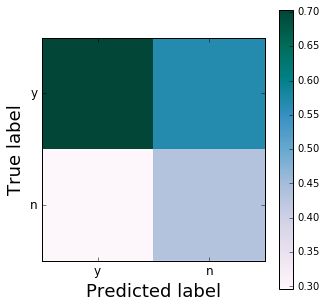

In [90]:
mpl.rc('figure', figsize=(5, 5))
plt.imshow(cm_pct, cmap=plt.cm.PuBuGn, interpolation='none')
plt.colorbar()
plt.xticks(range(len(cm_pct)), cm_pct.columns, family='Bitstream Vera Sans', fontsize=12)
plt.yticks(range(len(cm_pct)), cm_pct.columns, family='Bitstream Vera Sans', fontsize=12);
plt.ylabel('True label',family='Bitstream Vera Sans', fontsize=18)
plt.xlabel('Predicted label',family='Bitstream Vera Sans', fontsize=18)

In [91]:
from sklearn.metrics import roc_curve, auc

In [92]:
y_score = clf.fit(X_train, y_train).decision_function(X_test)

In [93]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

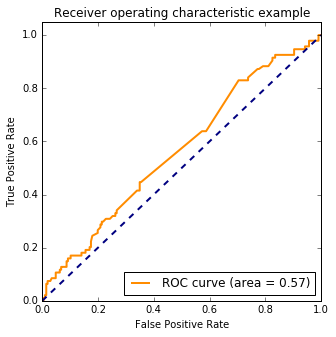

In [94]:
plt.figure()
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()